## Read the dataset

In [3]:
import pandas as pd
exam_data = pd.read_csv("StudentsPerformance.csv")
exam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Mapping the numeric values

In [9]:
# Function that would map the string value of parental education to interger
def refine_ParentalEdu(value):
    count =0
    if(value == "master's degree"):
        count = 6
    elif (value == "bachelor's degree"):
        count = 5
    elif(value == "associate's degree"):
        count =4
    elif(value == "some college"):
        count =3
    elif(value == "high school"):
        count =2
    else:
        count =1
    return count


def gender(val):
    if(val=="female"):
        return 0
    else:
        return 1
def test_prep(val):
    if(val == 'completed'):
        return 1
    else:
        return 0
def avg(math,read, writing):
    return (math+read+writing)//3
#Mapping the integer values to string values of Parent education 
parental_int = exam_data["parental level of education"]
values = [refine_ParentalEdu(x) for x in parental_int]
exam_data["parent_level"] =values

#Mapping the integer values to string values of Gender 
gender_int = exam_data["gender"]
value = [gender(x) for x in gender_int]
exam_data["gender_int"] =value


#Adding one more column for the avergae value for math, writing and reading score
avg_score= []
math_score = exam_data["math score"]
read_score = exam_data["reading score"]
write_score = exam_data["writing score"]
for i in range(len(math_score)):
     avg_score.append(avg(math_score[i],read_score[i],write_score[i]))
exam_data['avg_score'] = avg_score

#checks the test prep
test_int = exam_data["test preparation course"]
test_value = [test_prep(x) for x in test_int]
exam_data["test_int"] =test_value

exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parent_level,gender_int,avg_score,test_int
0,female,group B,bachelor's degree,standard,none,72,72,74,5,0,72,0
1,female,group C,some college,standard,completed,69,90,88,3,0,82,1
2,female,group B,master's degree,standard,none,90,95,93,6,0,92,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,4,1,49,0
4,male,group C,some college,standard,none,76,78,75,3,1,76,0


## Let's see the data
Exploring the datasets to find the correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B2A06B6D8>,
      dtype=object)

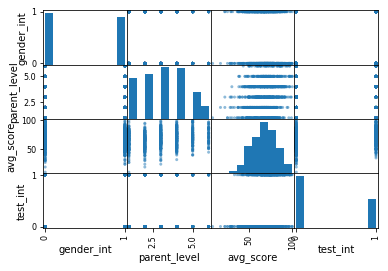

In [38]:
working_set = exam_data.copy()

# we do scatter plots first
from pandas.plotting import scatter_matrix

compare = ["gender_int", "parent_level", "avg_score", "test_int"]
scatter_matrix(working_set[compare])


In [41]:
corr = exam_data.corr()
print(corr)

               math score  reading score    ...     avg_score  test_int
math score       1.000000       0.817580    ...      0.918771  0.177702
reading score    0.817580       1.000000    ...      0.970048  0.241780
writing score    0.802642       0.954598    ...      0.965409  0.312946
parent_level     0.159432       0.190908    ...      0.205396 -0.007143
gender_int       0.167982      -0.244313    ...     -0.130483  0.006028
avg_score        0.918771       0.970048    ...      1.000000  0.256737
test_int         0.177702       0.241780    ...      0.256737  1.000000

[7 rows x 7 columns]


## Results:
Looking at the correlation the math score and reading score is highly related whereas parent level of education and test evalutaion is not so related to math score.

## PCA
Since the SVM and Decision tree don't perform good, I think there a classifier in the dataset. Since I am looking at the more attributes, PCA would be better than K-mean classifier. Let's see how the PCA perform to my datasets.

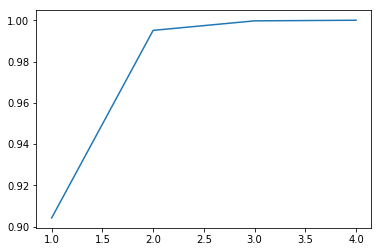

In [7]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
X=exam_data[["math score",'reading score','parent_level','gender_int']]
from sklearn.decomposition import PCA
pca_ds_3 = PCA()
pca_ds_3.fit(X)
cumulative_sums = np.cumsum(pca_ds_3.explained_variance_ratio_)

import matplotlib.pyplot as plt
d_values = [i+1 for i in range(0,len(cumulative_sums))]
plt.plot(d_values, cumulative_sums)
plt.show()

Looking at the knee, we can see there is a curve at 2.0 and slight distrubance in 3.0. Let's see the PCA at 2.0

## Let's see how the PCA fits model

In [8]:
kmeans_pca = PCA(n_components=2)
kmeans_model = KMeans(random_state = 29, max_iter=500, tol=0.1)

myPipe = Pipeline([
    ('pca', kmeans_pca),
    ('kmeans', kmeans_model)
])

print(myPipe)
myPipe.fit(X)


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=29, tol=0.1, verbose=0))])


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=29, tol=0.1, verbose=0))])

## Graphing the results for PCA
Lets do the scatter plot to see how we can classify the datasets.

C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


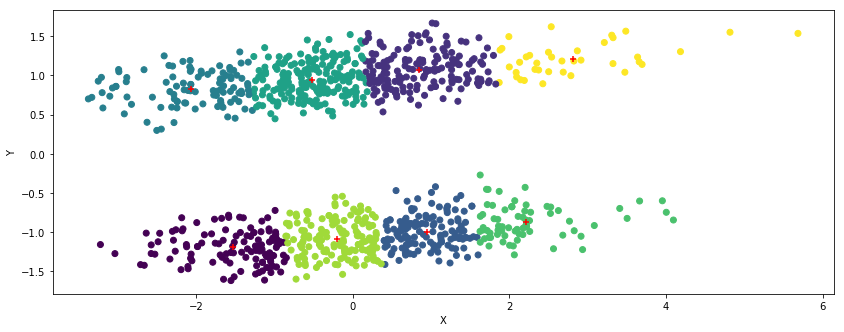

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

x=StandardScaler().fit_transform(exam_data.loc[:,["math score",'reading score','parent_level','gender_int']].values)
pca=PCA(n_components=2)
components=pca.fit_transform(x)
df=pd.DataFrame(data=components,columns=['x','y'])
X=df[["x",'y']]
kmeans_classifier=KMeans(n_clusters=8)
kmeans_classifier.fit(X)

cluster_x=[x for [x,y] in kmeans_classifier.cluster_centers_]
cluster_y=[y for [x,y] in kmeans_classifier.cluster_centers_]
fig = plt.figure(1, figsize=(14,14))
plt.scatter(df['x'],df['y'], c=kmeans_classifier.labels_)
plt.scatter(cluster_x,cluster_y,marker="+",color="red")

plt.xlabel("X")
plt.ylabel("Y")
plt.axis("scaled")
plt.show()

## Results:
This looks interesting. I can draw the line Y=0 to classify my datapoints. I guess the classification wouldbe awesome. 

## Random Forest Classifier
PCA does better job than decision tree and SVM. Let's see how Random Forest Classifier performs. 

In [46]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier


# generate 2d classification dataset
X = exam_data[['parent_level']]
Y = exam_data['avg_score']
model = RandomForestClassifier(random_state = 29)
model.fit(X, Y)
#print(X,Y)




C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=29, verbose=0, warm_start=False)

## Compute the performance:
Let's see how Random Forest Classifier performs for the training set.

In [47]:
from sklearn.metrics import confusion_matrix
y_predicted_prob = model.predict_proba(X)
y_predicted = y_predicted_prob.argmax(axis=1)
    
matrix = confusion_matrix(Y, y_predicted)
print(matrix)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(Y, y_predicted))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(Y, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(Y, y_predicted, average="weighted"))
print ("F1 is ", f1_score(Y, y_predicted, average="weighted"))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy is  0.006
Precision is  0.00027996167759179605
Sensitivity is  0.006
F1 is  0.0005343594941482905


C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', 

## Results:
Looking at the random forest classifier, it doesn't do well in this dataset. Only 6% is the accuracy. I guess PCA does the better job than Random Forest Classifier.